In [11]:
#상권(nanX,매출액총합,소득O):sang_income_nan.csv
sang_income_nan = pd.read_csv("sang_income_nan.csv", encoding='euc-kr')
sang_income_nan.tail(1)

,당월_매출_금액,기준_분기_코드,상권_코드,서비스_업종_코드,총_직장_인구_수,employee_rate,집객시설_수,총_유동인구_수,floating_pop_rate,운영_영업_개월_평균,폐업_영업_개월_평균,총 상주인구 수,총 가구 수,점포_수,유사_업종_점포_수,월_평균_소득_금액,지출_총금액
81552,2873564.0,4,1001010,CS300017,40,0.5,10,127636,0.520805,99,41,3088,1601,6.0,6.0,3589923,12120296344


In [4]:
# -상권(nanX,매출액/점포수,소득O):sang_income_div.csv
sang_income_div = pd.read_csv("sang_income_div.csv", encoding='euc-kr')
sang_income_div.tail(1)

,sales,기준_분기_코드,상권_코드,서비스_업종_코드,당월_매출_금액,총_직장_인구_수,employee_rate,집객시설_수,총_유동인구_수,floating_pop_rate,운영_영업_개월_평균,폐업_영업_개월_평균,총 상주인구 수,총 가구 수,점포_수,유사_업종_점포_수,월_평균_소득_금액,지출_총금액
81552,478927.333333,4,1001010,CS300017,2873564.0,40,0.5,10,127636,0.520805,99,41,3088,1601,6.0,6.0,3589923,12120296344


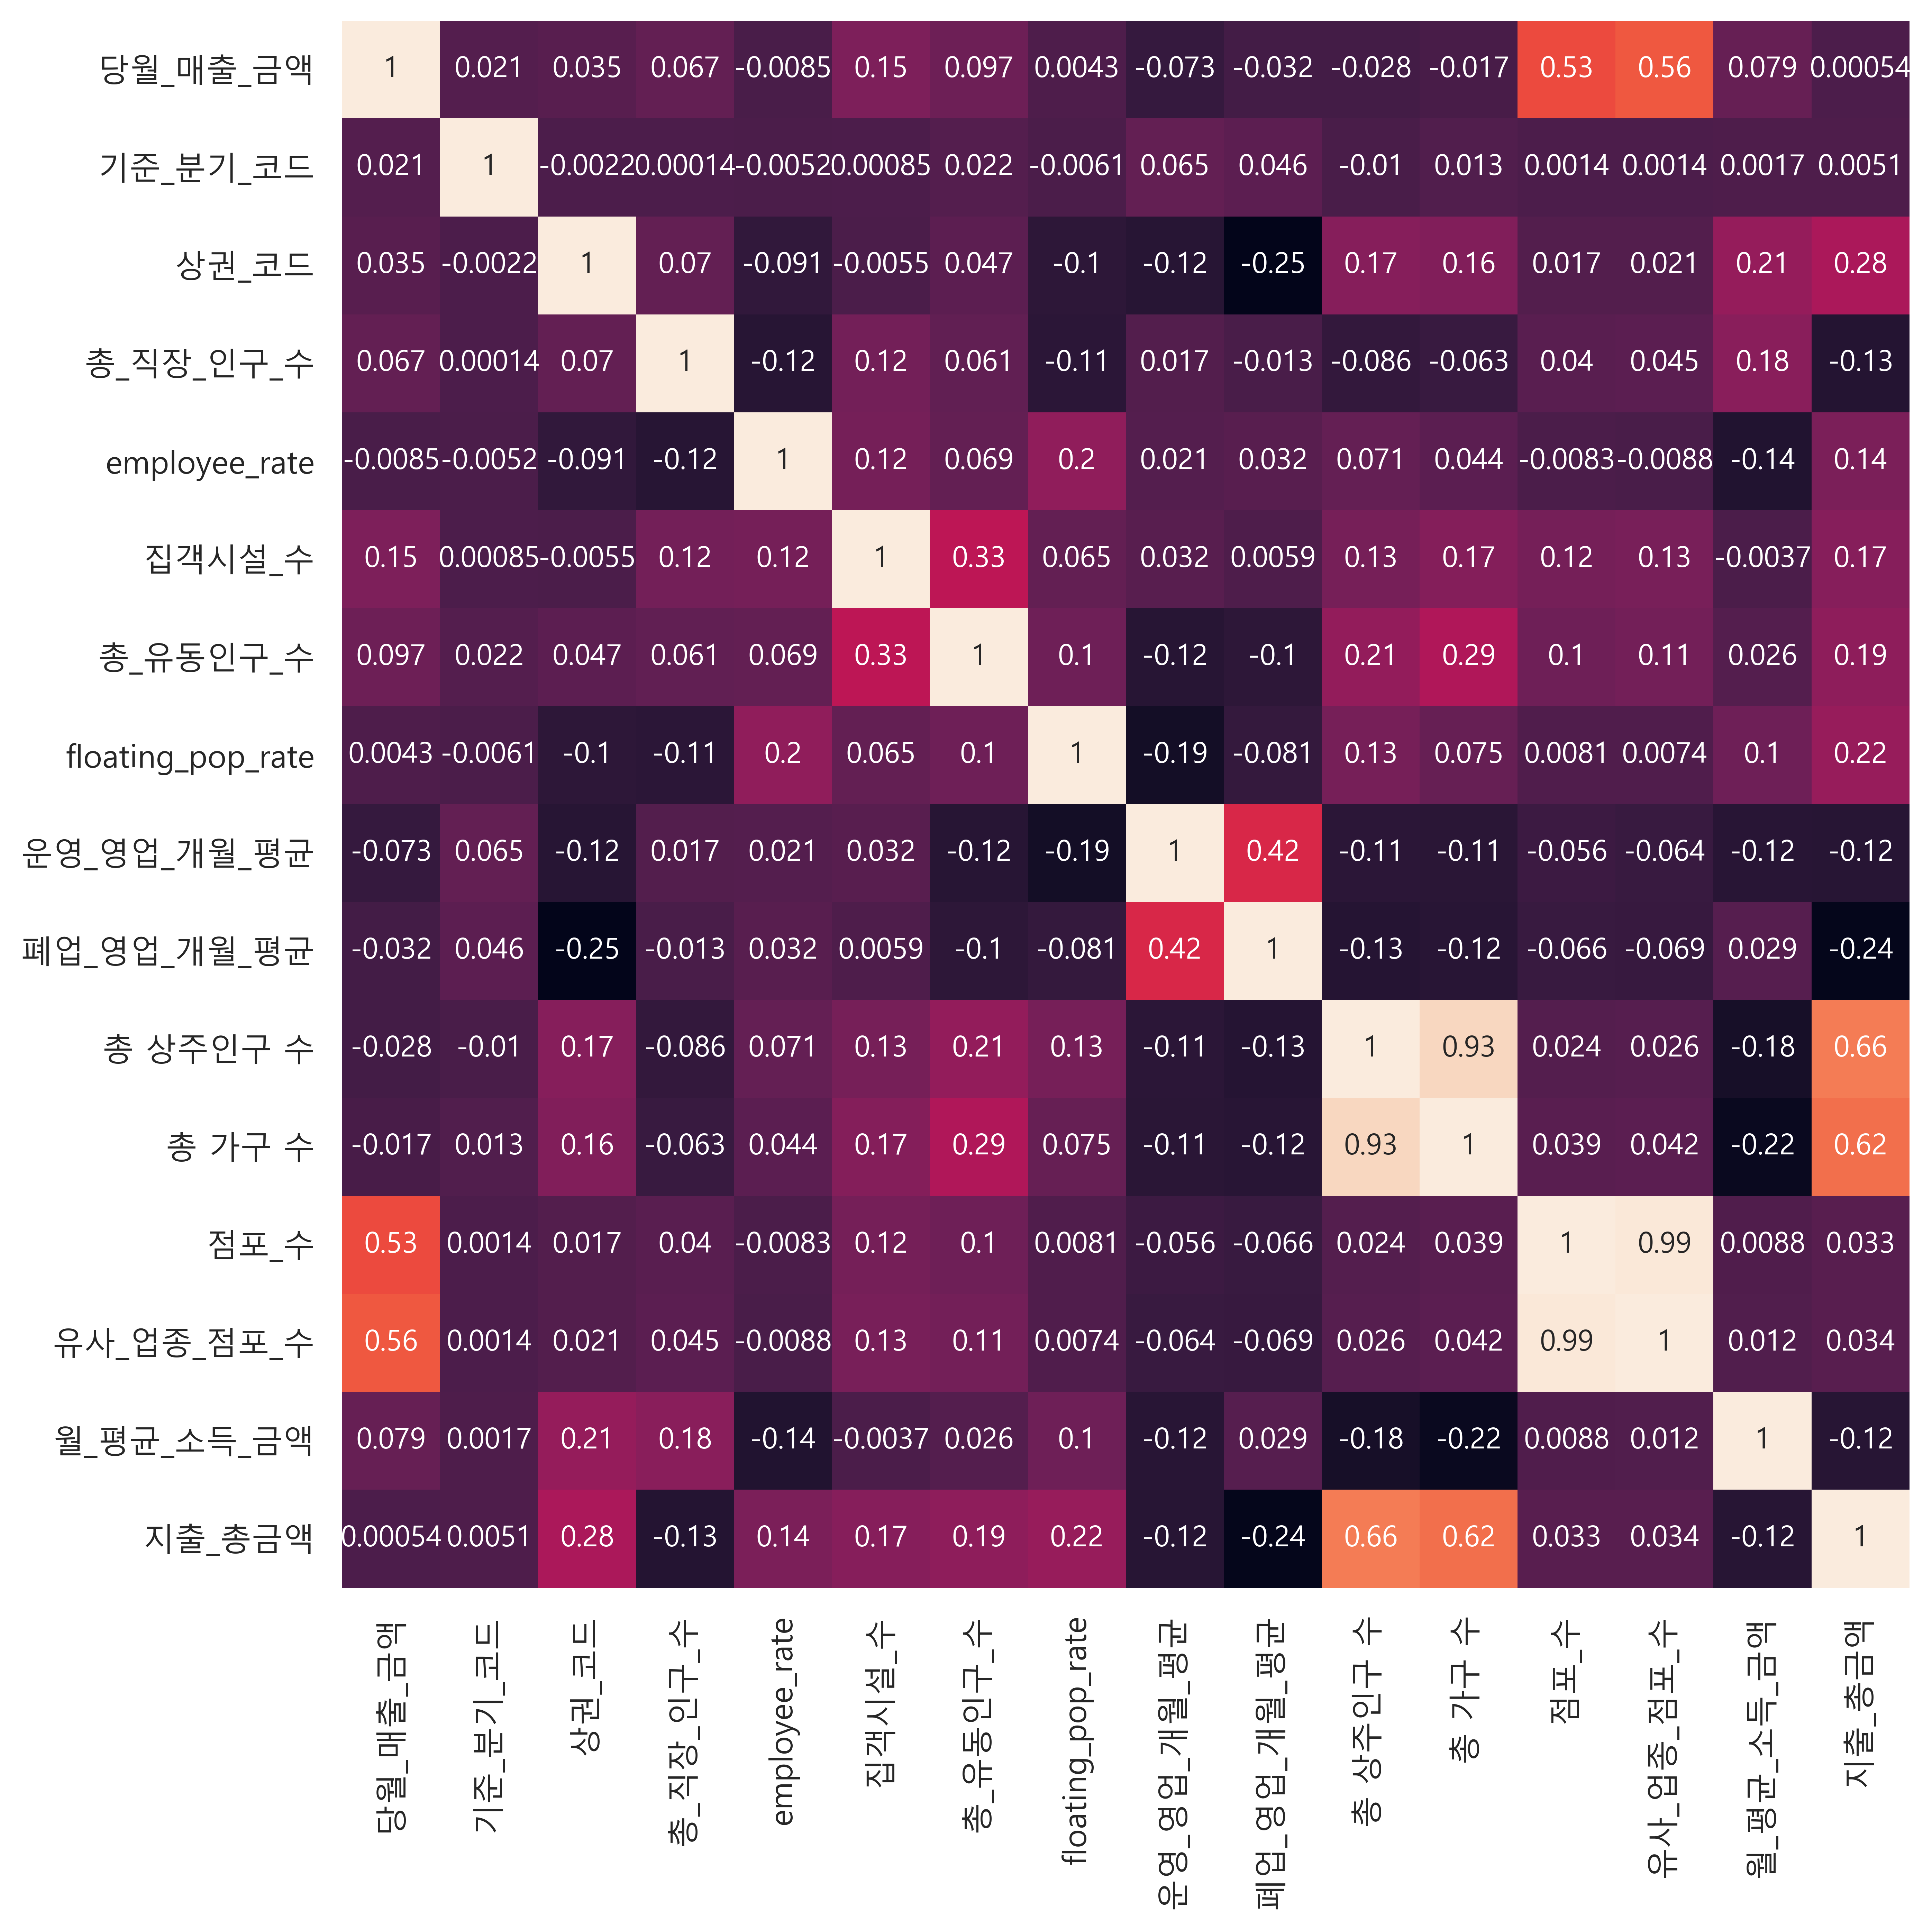

In [3]:
# 상관관계 분석
# 매출금액과 상관관계가 있다고 할만한 변수가 점포수, 유사업종점포수 정도 있다는것을 확인
corr = sang_income_nan[1:].corr()
plt.figure(figsize = (10,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=False)
plt.show()

In [4]:
sang_income_nan.columns

Index(['당월_매출_금액', '기준_분기_코드', '상권_코드', '서비스_업종_코드', '총_직장_인구_수',
       'employee_rate', '집객시설_수', '총_유동인구_수', 'floating_pop_rate',
       '운영_영업_개월_평균', '폐업_영업_개월_평균', '총 상주인구 수', '총 가구 수', '점포_수',
       '유사_업종_점포_수', '월_평균_소득_금액', '지출_총금액'],
      dtype='object')

In [1]:
#상권별로 다르게(유의미하게) 매출액에 영향을 미치는지 확인 : 일부 상권은 같은것으로 보아도 될 것 같다
#R2: 0.888

# import statsmodels.api as sm
# import sklearn as sk

# model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)", sang_income_nan)
# result = model.fit()
# print(result.summary())

In [6]:
#분기는 매출액에 영향을 미친다고 볼 수 없다. 따라서 분기는 무시하고 모두 2018년 데이터라고 생각하고 분석하겠다
model = sm.OLS.from_formula("당월_매출_금액 ~C(기준_분기_코드)", sang_income_nan)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               당월_매출_금액   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.15
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.26e-09
Time:                        09:30:32   Log-Likelihood:            -1.7525e+06
No. Observations:               81553   AIC:                         3.505e+06
Df Residuals:                   81549   BIC:                         3.505e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.284e+08   3.64e+06  

In [32]:
sang_income_nan.columns = ['당월_매출_금액', '기준_분기_코드', '상권_코드', '서비스_업종_코드', '총_직장_인구_수',
       'employee_rate', '집객시설_수', '총_유동인구_수', 'floating_pop_rate',
       '운영_영업_개월_평균', '폐업_영업_개월_평균', '총_상주인구_수', '총_가구_수', '점포_수',
       '유사_업종_점포_수', '월_평균_소득_금액', '지출_총금액']

In [28]:
import missingno as msno
msno.matrix(sang_income_nan)
plt.show()

In [77]:
"당월_매출_금액 ~C(상권코드)+"+"+".join(sang_income_nan.columns[4:])

'당월_매출_금액 ~C(상권코드)+총_직장_인구_수+employee_rate+집객시설_수+총_유동인구_수+floating_pop_rate+운영_영업_개월_평균+폐업_영업_개월_평균+총_상주인구_수+총_가구_수+점포_수+유사_업종_점포_수+월_평균_소득_금액+지출_총금액'

In [2]:
# 상권 더미변수 처리하여 OLS
# 일부상권은 유의미, 일부상권은 무의미(t-value값 기준)
# R2=0.388

# model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+"+"+".join(sang_income_nan.columns[4:]), data=sang_income_nan)
# result = model.fit()
# print(result.summary())

### 상권 더미변수 처리하여 OLS 결론
- R스퀘어가 0.388로 상권코드를 넣어서 설명력이 더 낮아짐
- 스케일링, 다중공선성 해결 필요
- 일부 상권코드는 무의미
    - 해결방법1) 지리가중회귀분석
    - 해결방법2) 클러스터링(좀더 조사 필요)
- 새로 추가한 배후지의 월_평균_소득_금액, 지출총금액은 무의미
    
    

#### 상권 더미변수 처리한것 scaling

In [124]:
for i in sang_income_nan[sang_income_nan.columns[4:]].columns:
    print("scale({})".format(i), end="+")

scale(총_직장_인구_수)+scale(employee_rate)+scale(집객시설_수)+scale(총_유동인구_수)+scale(floating_pop_rate)+scale(운영_영업_개월_평균)+scale(폐업_영업_개월_평균)+scale(총_상주인구_수)+scale(총_가구_수)+scale(점포_수)+scale(유사_업종_점포_수)+scale(월_평균_소득_금액)+scale(지출_총금액)+

In [8]:
# 상권 더미변수 처리 & formula 내에서 scaling
# 음의 왜도를 가진 경우가 많아서 mean을 사용한 스케일링은 스케일 문제를 해결하지 못하는 것으로 보임
# Warnings: [2] The smallest eigenvalue is 9.35e-30. This might indicate that there arestrong multicollinearity problems or that the design matrix is singular.
# R-squared:0.388

# model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+scale(총_직장_인구_수)+scale(employee_rate)+scale(집객시설_수)+\
# scale(총_유동인구_수)+scale(floating_pop_rate)+scale(운영_영업_개월_평균)+scale(폐업_영업_개월_평균)+scale(총_상주인구_수)+\
# scale(총_가구_수)+scale(점포_수)+scale(유사_업종_점포_수)+0", data=sang_income_nan)
# result = model.fit()
# print(result.summary())

In [131]:

from sklearn.preprocessing import RobustScaler

dfX=sang_income_nan[sang_income_nan.columns[4:]]
rb = RobustScaler()
rb.fit(dfX)
X_robust_scaled = rb.transform(dfX)
dfX2=pd.DataFrame(X_robust_scaled, columns= sang_income_nan[sang_income_nan.columns[4:]].columns)
sang_income_scaled = pd.concat([sang_income_nan[sang_income_nan.columns[[0,2]]], dfX2], axis=1)
sang_income_scaled.tail()


,당월_매출_금액,상권_코드,총_직장_인구_수,employee_rate,집객시설_수,총_유동인구_수,floating_pop_rate,운영_영업_개월_평균,폐업_영업_개월_평균,총_상주인구_수,총_가구_수,점포_수,유사_업종_점포_수,월_평균_소득_금액,지출_총금액
81548,1.503286e+09,1001010,-0.392473,0.073258,-0.222222,-0.42702,0.67433,0.0,-1.285714,0.336759,0.508453,-0.25,0.00,-0.014392,1.0746
81549,1.044454e+07,1001010,-0.392473,0.073258,-0.222222,-0.42702,0.67433,0.0,-1.285714,0.336759,0.508453,-0.25,-0.25,-0.014392,1.0746
81550,1.611965e+07,1001010,-0.392473,0.073258,-0.222222,-0.42702,0.67433,0.0,-1.285714,0.336759,0.508453,-0.50,-0.50,-0.014392,1.0746
81551,6.958385e+06,1001010,-0.392473,0.073258,-0.222222,-0.42702,0.67433,0.0,-1.285714,0.336759,0.508453,0.00,0.00,-0.014392,1.0746
81552,2.873564e+06,1001010,-0.392473,0.073258,-0.222222,-0.42702,0.67433,0.0,-1.285714,0.336759,0.508453,0.75,0.75,-0.014392,1.0746


In [13]:
len(pd.unique(sang_income_nan['상권_코드']))

969

In [9]:
#Robust Scaling 한 후 OLS
# from sklearn.preprocessing import RobustScaler

# dfX=sang_income_nan[sang_income_nan.columns[4:]]
# rb = RobustScaler()
# rb.fit(dfX)
# X_robust_scaled = rb.transform(dfX)
# dfX2=pd.DataFrame(X_robust_scaled, columns= sang_income_nan[sang_income_nan.columns[4:]].columns)
# sang_income_scaled = pd.concat([sang_income_nan[sang_income_nan.columns[[0,2]]], dfX2], axis=1)


# model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+"+"+".join(sang_income_scaled.columns[2:-2]), data=sang_income_scaled)
# result = model.fit()
# print(result.summary())

```
OLS Regression Results                            
==============================================================================
Dep. Variable:               당월_매출_금액   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     52.19
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:18:13   Log-Likelihood:            -1.7325e+06
No. Observations:               81553   AIC:                         3.467e+06
Df Residuals:                   80574   BIC:                         3.476e+06
Df Model:                         978                                         
Covariance Type:            nonrobust                                         
=======================================================================================
==============================================================================
Omnibus:                   108989.343   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88036196.952
Skew:                           7.132   Prob(JB):                         0.00
Kurtosis:                     163.326   Cond. No.                     1.44e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
```

In [142]:
#codf만 보고싶다면
#result.params

#### 결론
- 스케일링은 할 수 있다
- 하지만 다중공선성 문제 발생
- 해결하기 위해 상권코드를 통합하고, 변수를 줄이는것이 필요하다
- 소득은 유의하지 않아 이후 서비스 코드관련 분석시 생략할 예정이다

### 과최적화가 일어났는지 확인하기
- test set, traing set으로 split
- test set으로 모델링
- 만약 여러번 테스트 할때마다 r스퀘어 값이 많이 달라진다면 과최적화가 일어난것
- 해결방안
    - 변수선택법으로 의존적인 변수 삭제
        - 상권코드 묶음화 하는 방법
        ```
        1) 지리가중회귀분석
        2) 축소랭크 회귀분석으로 비슷한 변수 묶기
        3) 클러스터링(좀더 조사 필요)
        ```    
        - 상권코드 이외의 변수
            - VIF factor 참고
    - PCA 방법으로 의존적인 성분 삭제
    - 정규화(regularized)방법 사용

In [154]:
#### 1. 과최적화 일어났는지 K-fold 교차검증
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(sang_income_scaled)):
    df_train = sang_income_scaled.iloc[idx_train]
    df_test = sang_income_scaled.iloc[idx_test]
    
    model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+"+"+".join(sang_income_scaled.columns[2:-2]), data=sang_income_scaled)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((sang_income_scaled.당월_매출_금액 - pred) ** 2).sum()
    tss = ((sang_income_scaled.당월_매출_금액 - sang_income_scaled.당월_매출_금액.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))


학습 R2 = 0.38781057, 검증 R2 = 0.86092654
학습 R2 = 0.38781057, 검증 R2 = 0.88541023
학습 R2 = 0.38781057, 검증 R2 = 0.87579967
학습 R2 = 0.38781057, 검증 R2 = 0.89279226
학습 R2 = 0.38781057, 검증 R2 = 0.87288186


In [156]:
from sklearn.metrics import r2_score
#r2_score : 결정계수
#mean_squared_error: 평균 제곱 오차
#median_absolute_error: 절대 오차 중앙값

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(sang_income_scaled)):
    df_train = sang_income_scaled.iloc[idx_train]
    df_test = sang_income_scaled.iloc[idx_test]
    
    model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+"+"+".join(sang_income_scaled.columns[2:-2]), data=sang_income_scaled)
    result = model.fit()
        
    pred = result.predict(df_test)
    rsquared = r2_score(df_test.당월_매출_금액, pred)
    
    scores[i] = rsquared

scores

array([0.37969379, 0.41185489, 0.3775451 , 0.39907397, 0.37380957])

#### 소결론: 과최적화가 일어났다
### 과최적화 해결하기

In [143]:
#1. 상권코드 외 변수들: VIF factor 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX2.shape[1])]
vif["features"] = dfX2.columns
vif

,VIF Factor,features
0,1.092282,총_직장_인구_수
1,1.106268,employee_rate
2,1.197802,집객시설_수
3,1.286910,총_유동인구_수
4,0.641054,floating_pop_rate
5,1.173804,운영_영업_개월_평균
6,1.106994,폐업_영업_개월_평균
7,8.859580,총_상주인구_수
8,8.781749,총_가구_수
9,43.565263,점포_수


- 다른 변수에 의존적인 변수는 점포수, 유사업종 점포수
- 그러나 회귀분석시 p-value가 낮게 나와 우선 상권코드를 묶는것이 우선시 되어야 할 것 같다

### 2. 상권코드 묶기
#### 1) 지리가중회귀분석 (Geographically Weighted Regression)
- 공간적 이질성이 존재하는 경우 설명변수와 종속변수가 같은 위치에 있는 것이 아니므로 설명변수가 같은 정도로 변화하더라도 그것의 영향을 받는 종속변수는 크기는 공간적 위치에 따라 달라진다. 이와 같은 공간적 이질성으로 발생하는 이분산성을 해결하기 위해 지리가중회귀모형에서는 가중치를 사용한다. 즉, 지리가중회귀모형은 지역 간 거리가중행렬을 이용하여 지리적 위치 에 따른 변수 에 대한 지역별 회귀계수를 추정하는 것이다.

- 자세한 식은 다음의 문서를 참고 (https://docs.google.com/document/d/1-I1rFVHKqFb6LE3efr8K0ktYFVW6LTY3KstFnyTLK0U/edit?usp=sharing)
- 하지만 가중치행렬을 이해하는데 한계가 있어서 코드화 하기에 어려움을 겪어서 더이상 진행하지 못했다

#### 2) 클러스터링 방법으로 묶기
- https://datascienceschool.net/view-notebook/54ee87f1caf84311a0efcbe73fa9e1ea/
- https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/